In [1]:
from astropy.io import fits
import pandas as pd
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
from healpy.visufunc import projscatter
from healpy.pixelfunc import ang2pix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "../../Massive-Correlation-Functions/data/ranfomHSCmask.fits"

In [3]:
hdul = fits.open(file)

In [4]:
points = pd.DataFrame(hdul[1].data)

In [5]:
points.shape[0]

12118087

In [6]:
NSIDE = 2**10
NPIX = hp.nside2npix(NSIDE)
print(NPIX)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
m = np.zeros(NPIX)

12582912
Approximate resolution at NSIDE 1024 is 0.057 deg


In [7]:
m.shape[0]

12582912

In [8]:
for j in range(points.shape[0]):
        m[ang2pix(NSIDE, points['ra'][j], points['dec'][j], nest=False, lonlat=True)]=1

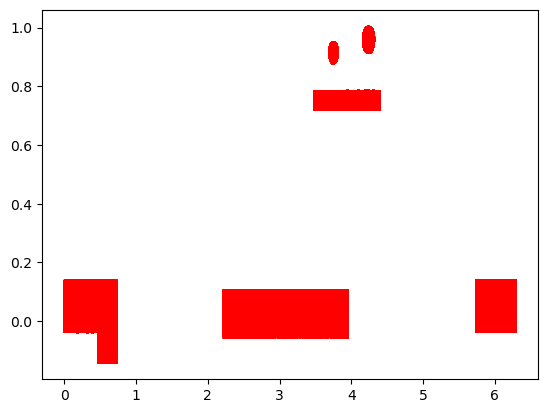

In [9]:
plt.scatter(np.deg2rad(points["ra"]), np.deg2rad(points["dec"]), color="r", marker="*", linewidth=1, s=1)
plt.show()

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors

# Color for False and True
cmap = matplotlib.colors.ListedColormap(['lightblue', 'orange'])

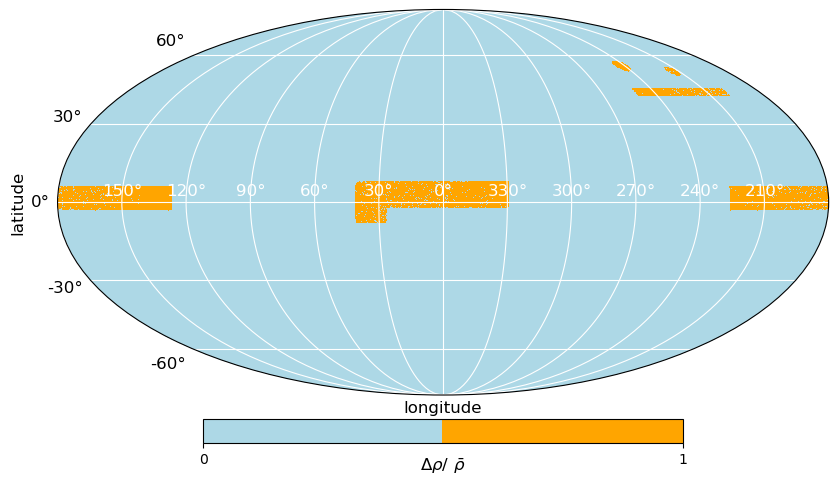

In [11]:
projview(
    m,
    coord=["G"],
    graticule=True,
    graticule_labels=True,
    unit=r"$\Delta \rho /\ \bar{\rho}$",
    xlabel="longitude",
    ylabel="latitude",
    longitude_grid_spacing=30,
    cb_orientation="horizontal",
   title='',
    #cbar_ticks=[-1,0,1,2],
    cmap=cmap,
    xtick_label_color='white',
    ytick_label_color='black',
    graticule_color='white',
    min=0,
    max=1,
    projection_type="mollweide",flip='astro',zorder=1)
# orbita de la nube mayor
#newprojplot(np.deg2rad(90-(points['dec'])), np.deg2rad(points['ra']),  'b.')

In [12]:
# Nearby galaxies mask

In [24]:
from astropy.io import fits
fits_image_filename = '../data/50MGC/data/catalog.fits'
hdul = fits.open(fits_image_filename)

In [25]:
hdul.info()

Filename: ../data/50MGC/data/catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    256   15424R x 58C   [29A, J, J, J, D, D, D, D, D, D, D, D, D, 3A, D, D, D, D, D, 6A, 6A, D, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 32A, D, D, 32A, J, J, D, D, D, D, D, D, 64A, D, D, D, D, D]   


In [26]:
data = hdul[1].data

In [27]:
nearby_galax_df = pd.DataFrame(data)

In [28]:
nearby_galax_df.columns

Index(['objname', 'pgc', 'nsaid', 'group_id', 'ra', 'dec', 'ra_nsa', 'dec_nsa',
       'ra_ned', 'dec_ned', 'd25', 'v_h', 'v_cmb', 'v_source', 'hl_obj',
       'lvg_obj', 'nsa_obj', 'sga_obj', 't_type', 'color_type', 'best_type',
       'a_B_leda', 'a_g_nsa', 'EBV_irsa', 'Bt0_leda', 'BV_color_leda', 'B_lum',
       'gi_color_nsa', 'i_lum_nsa', 'gr_color_sga', 'r_lum_sga',
       'BR_color_ned', 'R_lum_ned', 'BMag', 'gi_color', 'mag_flag', 'cf3_dist',
       'cf3_dist_error', 'zind_dist', 'zind_dist_error', 'zind_indicator',
       'bestdist', 'bestdist_error', 'bestdist_method', 'bestdist_source',
       'dist_ned_flag', 'logmass_gi', 'logmass_gr', 'logmass_BV', 'logmass_BR',
       'logmass', 'logmass_error', 'logmass_src', 'chandra_observation',
       'chandra_detection', 'log_lx', 'chandra_detection_3arcsec',
       'log_lx_3arcsec'],
      dtype='object')

In [29]:
nearby_galax_df.shape

(15424, 58)

In [19]:
nearby_galax_df["lvg_obj"].unique

<bound method Series.unique of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15419    0.0
15420    0.0
15421    0.0
15422    0.0
15423    0.0
Name: lvg_obj, Length: 15424, dtype: float64>

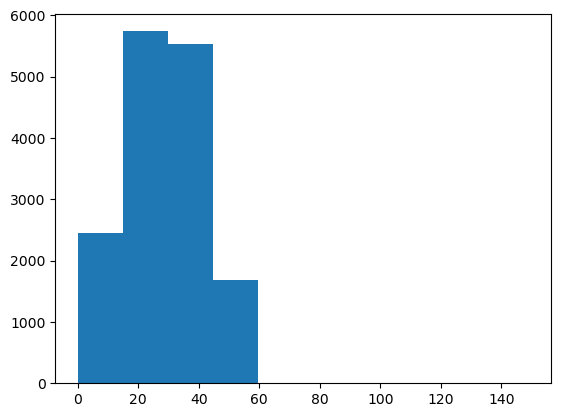

In [20]:
plt.hist(nearby_galax_df["bestdist"])
plt.show()

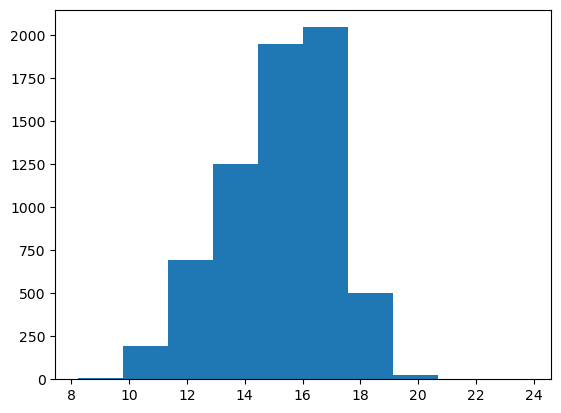

In [21]:
import matplotlib.pyplot as plt
plt.hist(-2.5*np.log10(nearby_galax_df["i_lum_nsa"])+5*np.log10(nearby_galax_df["bestdist"]*1e6))
plt.show()

In [22]:
nearby_galax_df["imag_app"]

KeyError: 'imag_app'

1 PGC2807150 208.639395 4.2444378 16.228945046489464 2.61
2 UGC09240 216.181452 44.5259117 12.94794379858429 2.83


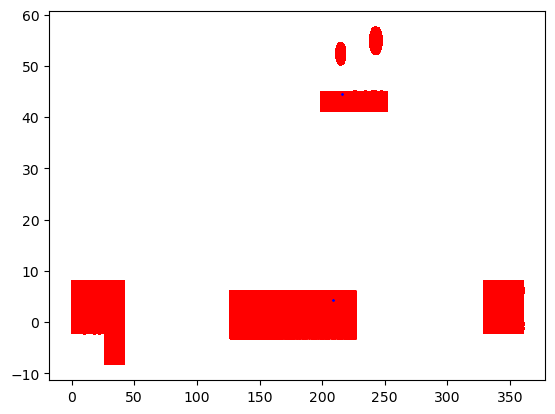

In [47]:
k = 0
dist_cut = 5
imag_cut = 18
nearby_galax_df["imag_app"] = np.zeros(nearby_galax_df.shape[0])
plt.scatter(points["ra"], points["dec"], color="r", marker="*", linewidth=1, s=1)
for i in range(nearby_galax_df.shape[0]):
    # nearby_galax_df.iloc[58, i]=-2.5*np.log10(nearby_galax_df["i_lum_nsa"][i])+5*np.log10(nearby_galax_df["bestdist"][i]*1e6)
    if m[ang2pix(NSIDE, nearby_galax_df['ra'][i], nearby_galax_df['dec'][i], nest=False, lonlat=True)] == 1:
        if nearby_galax_df["bestdist"][i] < dist_cut:
            if -2.5*np.log10(nearby_galax_df["i_lum_nsa"][i])+5*np.log10(nearby_galax_df["bestdist"][i]*1e6) < imag_cut: 
                k=k+1
                print(k, nearby_galax_df['objname'][i], nearby_galax_df['ra'][i], nearby_galax_df['dec'][i], -2.5*np.log10(nearby_galax_df["i_lum_nsa"][i])+5*np.log10(nearby_galax_df["bestdist"][i]*1e6), nearby_galax_df["bestdist"][i])
                plt.scatter(nearby_galax_df["ra"][i], nearby_galax_df["dec"][i], color="b", marker="*", linewidth=1, s=1)
plt.show()

In [ ]:
# Hereafter galstreams

In [34]:
import galstreams
import astropy
import astropy.coordinates as ac
import astropy.units as u

In [35]:
mws = galstreams.MWStreams(verbose=False, implement_Off=False, print_topcat_friendly_files=False)

Initializing galstreams library from master_log... 


In [36]:
tnames = mws.get_track_names_in_sky_window([-30,30]*u.deg, [-5,5]*u.deg, frame=ac.FK5,
                                           On_only=True)#, wrap_angle=180.*u.deg)

In [37]:
wa = 180*u.deg 

In [38]:
tnames

['Cetus-New-Y21',
 'Cetus-Palca-T21',
 'Cetus-Y13',
 'M2-I21',
 'Murrumbidgee-G17',
 'Palca-S18',
 'PS1-A-B16',
 'Sagittarius-A20']

In [39]:
mws['C-19-I21'].track.ra.deg

array([354.15504339, 354.15587677, 354.15670972, ..., 355.30613033,
       355.30621358, 355.30629665])

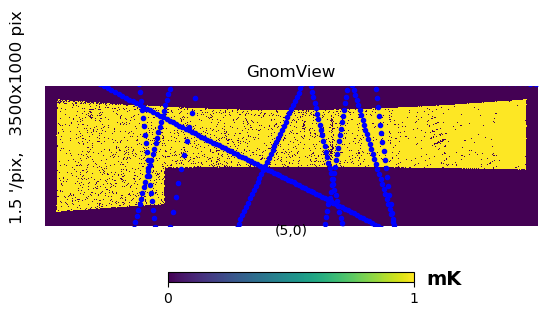

In [40]:
hp.gnomview(m, rot=[5, 0], xsize=3500, ysize=1000, title="GnomView", unit="mK", format="%.2g")

#for st in tnames:
hp.projscatter(mws['Murrumbidgee-G17'].track.ra.deg, mws['Murrumbidgee-G17'].track.dec.deg, marker=".", color="b")

<function matplotlib.pyplot.show(close=None, block=None)>

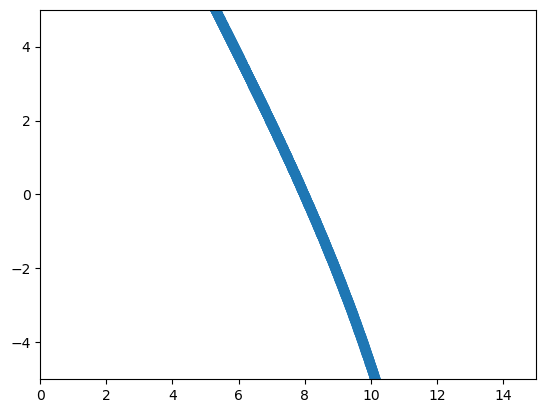

In [41]:
plt.scatter(mws['Murrumbidgee-G17'].track.ra.deg, mws['Murrumbidgee-G17'].track.dec.deg)
plt.ylim([-5,5])
plt.xlim([0,15])
plt.show

In [42]:
mws.summary[:3] #show only the first few lines

,Imp,On,TrackName,Name,TrackRefs,TrackRefsLatex,Notes,length,ra_o,dec_o,...,distance_mid,ra_pole,dec_pole,InfoFlags,has_empirical_track,has_D,has_pm,has_vrad,DiscoveryRefs,ID
TrackName,,,,,,,,,,,,,,,,,,,,,
20.0-1-M18,po,True,20.0-1-M18,20.0-1,mateu2018,Mateu2018,-,36.619756,280.225879,-41.031405,...,26.839948,235.758575,38.821881,0000,0,0,0,0,Mateu2018,1
300S-F18,st,True,300S-F18,300S,fu2018,Fu2018,-,11.084050,151.800005,16.046962,...,15.929409,308.056470,72.509388,1101,1,1,0,1,"NiedersteOstholt2009,Simon2011",2
AAU-AliqaUma-L21,st,True,AAU-AliqaUma-L21,AAU-AliqaUma,li2021,Li2021,-,9.677187,31.157872,-32.879053,...,21.981943,74.259068,47.933124,1111,1,1,1,1,Shipp2018,3


In [43]:
from mpl_toolkits.basemap import Basemap

In [44]:
ac.de

AttributeError: module 'astropy.coordinates' has no attribute 'de'

<Axes: >

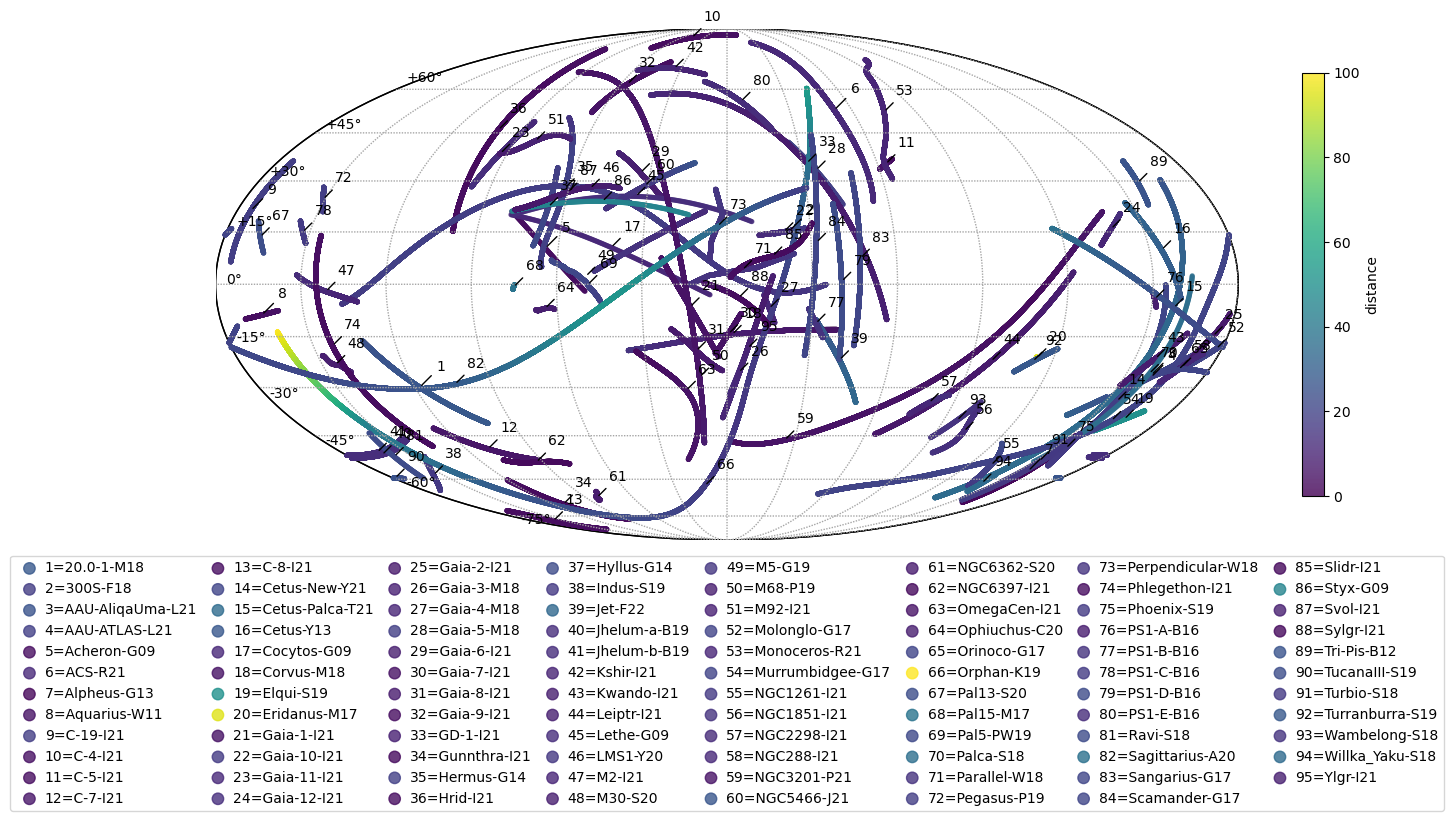

In [45]:
#The method allows passing kwd dictionaries to customize (hopefully) most aspects of the plot. For example, you can plot
scat_kwds = dict(vmin=5, vmax=100., alpha=0.75, s=10, marker='.')
cb_kwds = dict(label='Distance (kpc)', shrink=0.5)

#The method returns the current axes, so you can overplot further layers 
mws.plot_stream_compilation(frame=ac.FK5, C_attribute='distance')#, scat_kwds=scat_kwds, cb_kwds=cb_kwds) 